In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

###  POSITION DISTRIBUTION

think this may acc be displacement from centre?

In [42]:


def position_probability_density(directory, annotation_text=None):

    name = directory[-1]

    distances = pd.DataFrame()


    def distance_from_centre(x1, y1, x2=700, y2=700):

        return np.sqrt((x1 - x2)**2 + (y1- y2)**2)
    

    for file in os.listdir(directory):

        if file.endswith("csv"):
            
            # join the directory and filename so you can read it

            file_path = os.path.join(directory, file)
            
            # read the csv file
            df = pd.read_csv(file_path)


            # for every x y body coordinate want to 

            df['distance from centre'] = df.apply(lambda row: distance_from_centre(row['x_body'], row['y_body']), axis=1) # axis 1= row 


            distances = pd.concat([distances, df], ignore_index=True) # reset index each time 

    
    positions = distances['distance from centre'] # must be a 1d array 

    positions = positions.replace([np.inf, -np.inf], np.nan).dropna() # some infinite values and nan values unsure why- but anyway remove them 
    # replace both positive infinte and negative infinite values with nan 

    kde = gaussian_kde(positions) #kernel estimate density function for the kde data 
    
    
    range = np.linspace(positions.min(), positions.max(), 100)
    # this generates a range of values over which the KDE will be evaluated.
    # np.linspace(start, stop, num)

    density = kde(range)
    # evaluates the KDE at each of the points in the range provided 

    plt.plot(range, density)
    
    # vel range - is the x values (min, max and incriments were provided
    # 
    # # density is the y value of this plot 
    
    # return distances

    plt.title('Position Probability Density', fontweight='bold')

    plt.xlabel('Distance from Centre', fontweight='bold')
    plt.ylabel('Density', fontweight='bold')

    plt.xlim(0, 800)

    if annotation_text:
        plt.text(0.95, 0.95, annotation_text, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

    plt.show()



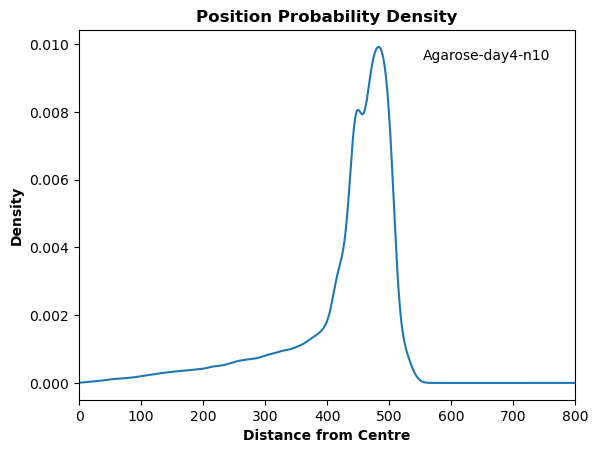

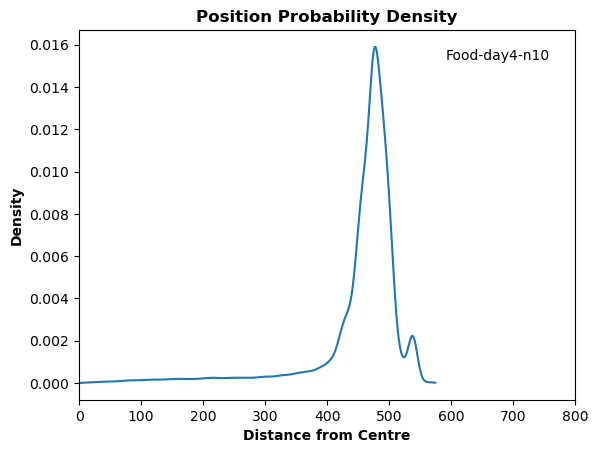

In [39]:
agarose_n10 = position_probability_density("/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extraction/agarose-2", 'Agarose-day4-n10')

food_n10 =  position_probability_density("/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extraction/food-2", 'Food-day4-n10')

# idk why pixel data is maximal like this for agarose 
  # 

In [24]:
# agarose_n10['distance from centre'].isna().sum() # how many nan values

# np.isinf(agarose_n10['distance from centre']).sum() # how many infinite values 

0

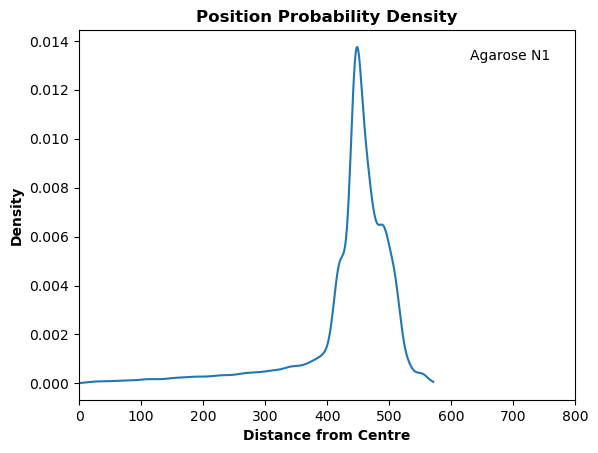

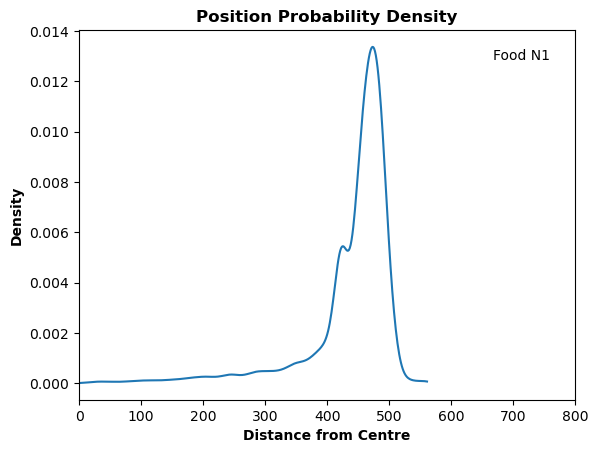

In [40]:
agarose_n1 = position_probability_density('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extract/N1/AGAROSE', 'Agarose N1')

food_n1 = position_probability_density('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extract/N1/FOOD', 'Food N1')

In [48]:
# ONLY FOR FIRST 600 FRAMES

def position_probability_density_10mins(directory, annotation_text=None):

    name = directory[-1]

    distances = pd.DataFrame()


    def distance_from_centre(x1, y1, x2=700, y2=700):

        return np.sqrt((x1 - x2)**2 + (y1- y2)**2)
    

    for file in os.listdir(directory):

        if file.endswith("csv"):
            
            # join the directory and filename so you can read it

            file_path = os.path.join(directory, file)
            
            # read the csv file
            df = pd.read_csv(file_path)

            df_10mins = df.loc[:599, :]

            # for every x y body coordinate want to 

            df_10mins['distance from centre'] = df_10mins.apply(lambda row: distance_from_centre(row['x_body'], row['y_body']), axis=1) # axis 1= row 


            distances = pd.concat([distances, df_10mins], ignore_index=True) # reset index each time 

    
    positions = distances['distance from centre'] # must be a 1d array 

    positions = positions.replace([np.inf, -np.inf], np.nan).dropna() # some infinite values and nan values unsure why- but anyway remove them 
    # replace both positive infinte and negative infinite values with nan 

    kde = gaussian_kde(positions) #kernel estimate density function for the kde data 
    
    
    range = np.linspace(positions.min(), positions.max(), 100)
    # this generates a range of values over which the KDE will be evaluated.
    # np.linspace(start, stop, num)

    density = kde(range)
    # evaluates the KDE at each of the points in the range provided 

    plt.plot(range, density)
    
    # vel range - is the x values (min, max and incriments were provided
    # 
    # # density is the y value of this plot 
    
    # return distances

    plt.title('Position Probability Density', fontweight='bold')

    plt.xlabel('Distance from Centre', fontweight='bold')
    plt.ylabel('Density', fontweight='bold')

    plt.xlim(0, 800)

    if annotation_text:
        plt.text(0.95, 0.95, annotation_text, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

    plt.show()



/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_85886/3560706359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10mins['distance from centre'] = df_10mins.apply(lambda row: distance_from_centre(row['x_body'], row['y_body']), axis=1) # axis 1= row
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_85886/3560706359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10mins['distance from centre'] = df_10mins.apply(lambda row: distance_from_centre(row['x_body'], row['y_body']), 

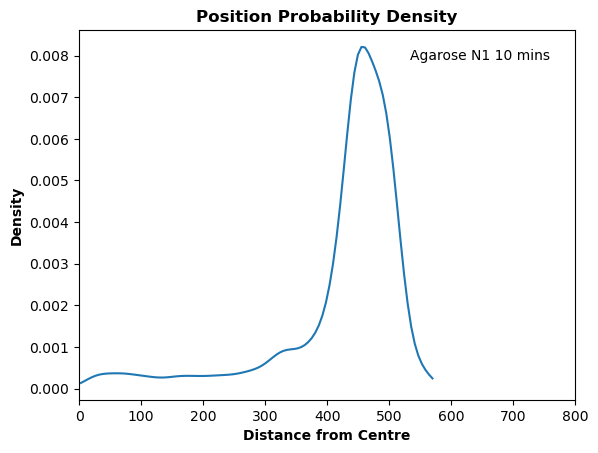

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_85886/3560706359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10mins['distance from centre'] = df_10mins.apply(lambda row: distance_from_centre(row['x_body'], row['y_body']), axis=1) # axis 1= row
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_85886/3560706359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10mins['distance from centre'] = df_10mins.apply(lambda row: distance_from_centre(row['x_body'], row['y_body']), 

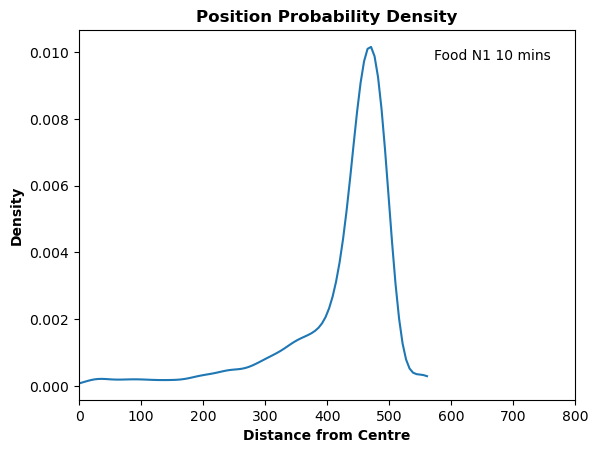

In [50]:
agarose_n1 = position_probability_density_10mins('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extract/N1/AGAROSE', 'Agarose N1 10 mins')

food_n1 = position_probability_density_10mins('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extract/N1/FOOD', 'Food N1 10 mins')